In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('results.csv', sep=';')
df.head()

,Name,OriginalSize,BxesSize,BxesPreprocessing,ZipSize,BxesToXesSize,ExiSize
0,CCC19 - Log XES,806604,21732,21166,26474,784533,21653
1,not_existing_assembly_loading_50,69765356,1398690,1370231,3031019,68701568,1496488
2,unsafe_fixed_50,24518888,414890,404778,1132204,23971780,535439
3,task_test_project_50,97435590,1831234,1800133,4166718,95865257,1983930
4,intensive_thread_pool_25,553313386,11488539,11184277,14753209,535664692,10882575


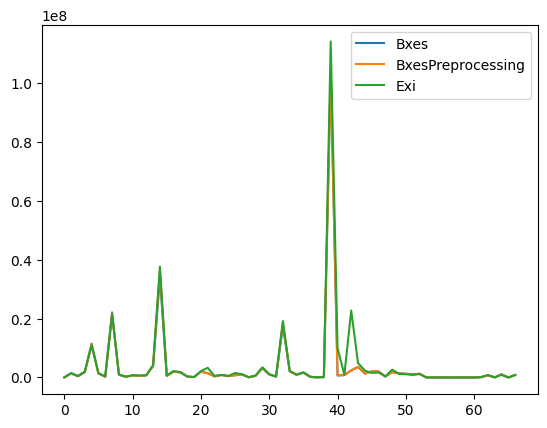

In [23]:
x = [x for x in range(len(df['BxesSize'].to_numpy()))]

bxes_line = df['BxesSize'].to_numpy()
bxes_preprocessing = df['BxesPreprocessing'].to_numpy()
exi = df['ExiSize'].to_numpy()

plt.plot(x, bxes_line, label='Bxes')
plt.plot(x, bxes_preprocessing, label='BxesPreprocessing')
plt.plot(x, exi, label='Exi')
plt.legend()
plt.show()